# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача провести исследовательский анализ данных, ответить на частные вопросы и выявить основные зависимости.

В ходе проекта используются библиотеки pandas, numpy, matplotlib. Анализируются описательные статистики, коэффициенты корреляции. Распределения переменных и их взаимозависимость анализируется с помощью графиков.

## Изучение данных из файла

Читаем файл. Заранее оговорим, что с первого раза не получится, т.к. в базе особый разделитель в данных - "/t", укажем его в качестве аргумента. Десятые доли отображаются корректно, поэтому аргумент decimals при чтении данных опустим.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_data.csv', sep= '\t')
display(df)
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Наша база данных содержит 22 столбца и 23 699 строк. Наша основная задача - научиться определять стоимость квартиры, т.е. переменную last_price по всем остальным независимым признакам. Имеющимися инструментами предсказывать значение last_price мы не сможем, однако мы выполним предварительный анализ: определим,что в наибольшей степени влияет на цену и каков характер этой зависимости.
Полных дубликатов база не содержит (проверили через `df.duplicated().sum()`). Поэтому начнём работу с пропущенных данных, их достаточно много.

## Предобработка данных

Почти половина базы квартир не имеет данных о высоте потолков ('ceiling_height'). Это важная для анализа переменная, однако пропущенные данные разнятся по всем остальным признакам. Если бы, например, у нас отсутствовала высота потолков у квартир одной площади или географии, данные можно было бы попытаться заполнить. Кроме того, высота потолков зависит от типа серии постройки дома, а этих данных в базе нет. По имеющимся данным заполнить высоту потолков будет ненадёжно, поэтому оставим пропуски в высоте потолков как есть. По той же причине оставим пропуски как есть в переменных этажности дома ('floors_total'), населённого пункта ('locality_name') и количества дней продажи квартиры ('days_exposition').

А вот пропуски в жилой площади квартиры можно восстановить. Посмотрим на связь общей площади и жилой.

0.9395373338721491

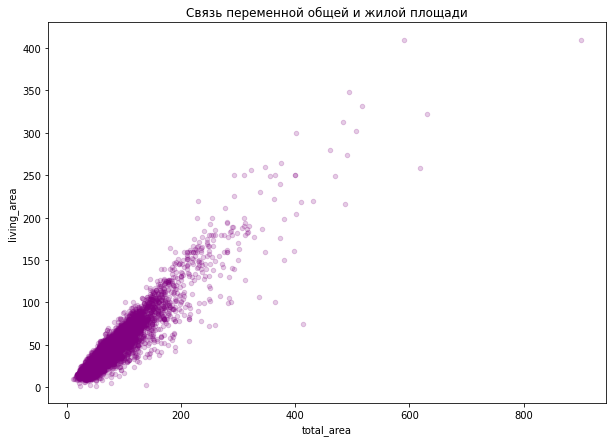

In [4]:
df.plot(
        x='total_area',
        y='living_area',
        kind='scatter',
        figsize=(10,7),
        title='Связь переменной общей и жилой площади',
        color='purple',
        alpha=0.2)
df['total_area'].corr(df['living_area'])

Коэффициент корреляции крайне высокий, жилая площадь определяется общей. Очистим обе переменные от менее 1% крайне высоких значений и рассчитаем пропущенные значения жилой площади через общую.

В переменной жилой площади квартиры есть выбросы:

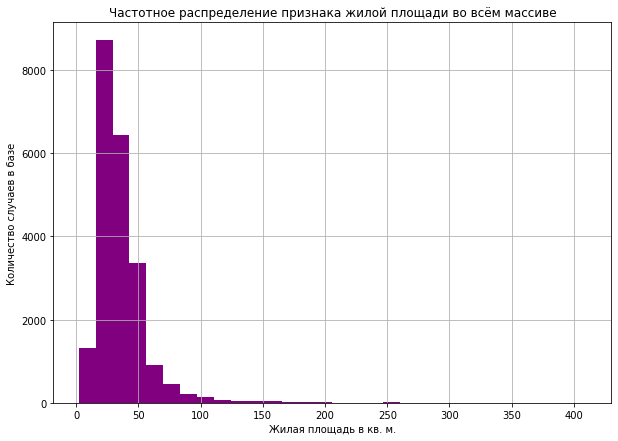

In [5]:
plt.title('Частотное распределение признака жилой площади во всём массиве')
plt.xlabel('Жилая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df['living_area'].hist(bins=30,color='purple',figsize=(10,7))
None

Значения встречаются с относительной частотой до 200 метров, далее популярность таких площадей сомнительна. Визуализируем разброс данных диаграммой размаха.

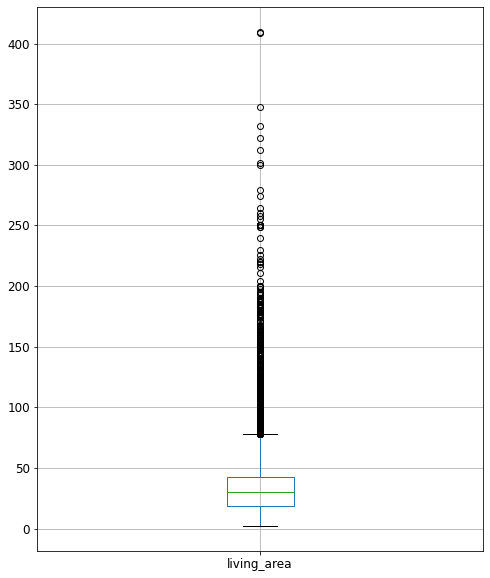

In [6]:
df.boxplot(column = 'living_area', fontsize=12, figsize=(8,10))

У переменной явно длинный "хвост", который можно сократить. Посмотрим на частоту встречаемых значений при площади квартиры от 200 метров.

31

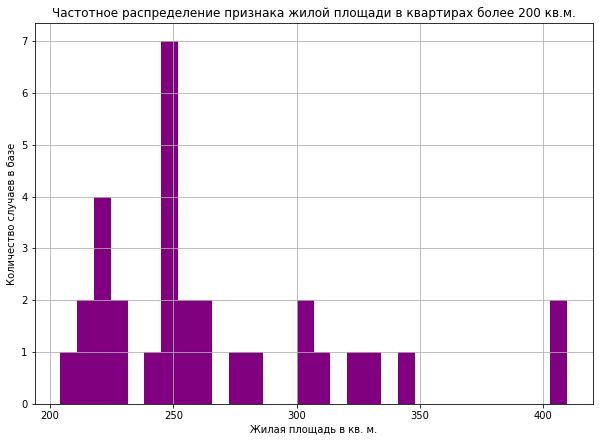

In [7]:
plt.title('Частотное распределение признака жилой площади в квартирах более 200 кв.м.')
plt.xlabel('Жилая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df.query("living_area > 200")['living_area'].hist(bins=30,color='purple',figsize=(10,7))
df.query("living_area > 200")['living_area'].count()

Квартиры с жилой площадью от 200 метров встречаются редко, всего 31 кейс. Их стоимость будет зависеть не от средних показателей рынка, а от прочих факторов (дизайн-проект, амбиции собственника, желание быстро продать недвижимость), заменим эти данные на пропуски.

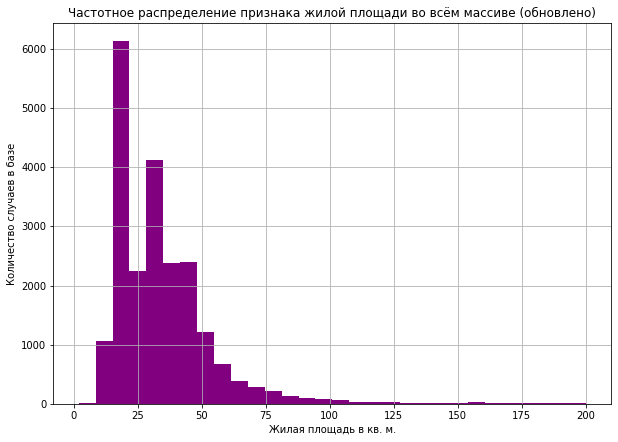

In [8]:
df['living_area'] = df.query("living_area <= 200")['living_area']

plt.title('Частотное распределение признака жилой площади во всём массиве (обновлено)')
plt.xlabel('Жилая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')
df['living_area'].hist(bins=30,color='purple',figsize=(10,7))

Посмотрим, как теперь изменился разброс данных на диаграмме размаха.

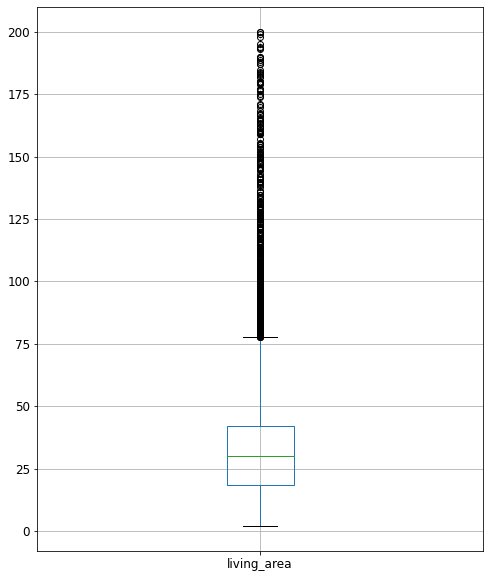

In [9]:
df.boxplot(column = 'living_area', fontsize=12, figsize=(8,10))

Квартили и медиана остались на месте, значит, мы несущественно поменяли основные показатели базы.

Аналогично поступим с общей площадью.

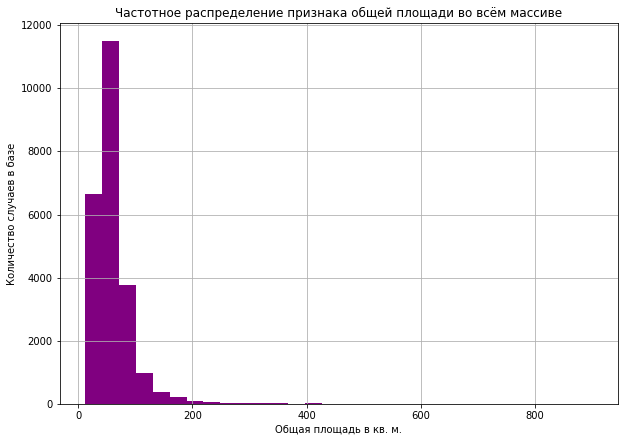

In [10]:
plt.title('Частотное распределение признака общей площади во всём массиве')
plt.xlabel('Общая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df['total_area'].hist(bins=30,color='purple',figsize=(10,7))
None

Посмотрим на квартиры общей площадью от 300 метров:

61

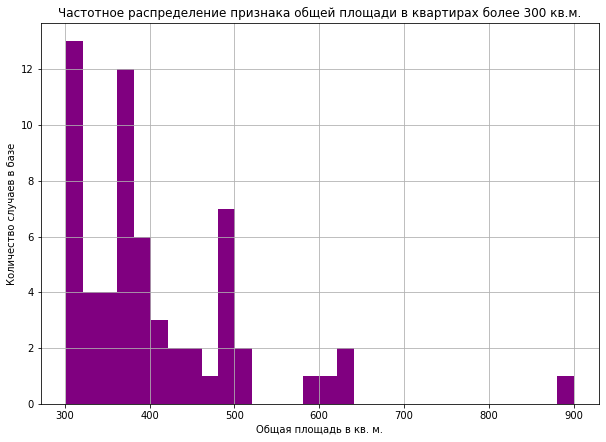

In [11]:
plt.title('Частотное распределение признака общей площади в квартирах более 300 кв.м.')
plt.xlabel('Общая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df.query("total_area > 300")['total_area'].hist(bins=30,color='purple',figsize=(10,7))
df.query("total_area > 300")['total_area'].count()

Опустим эти данные для более корректных средних показателей.

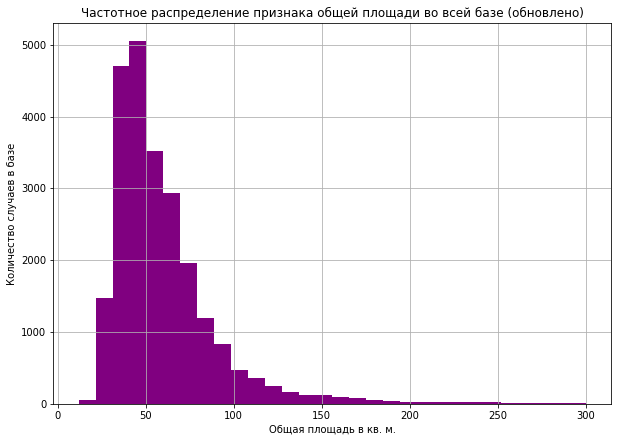

In [12]:
df['total_area'] = df.query("total_area <= 300")['total_area']

plt.title('Частотное распределение признака общей площади во всей базе (обновлено)')
plt.xlabel('Общая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df['total_area'].hist(bins=30,color='purple',figsize=(10,7))
None

Ещё раз взглянем на диаграмму рассеивания.

0.9338405945192771

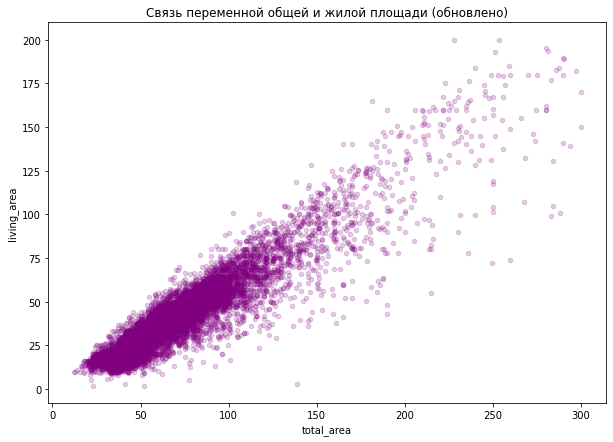

In [13]:
df.plot(
        x='total_area',
        y='living_area',
        kind='scatter',
        figsize=(10,7),
        title='Связь переменной общей и жилой площади (обновлено)',
        color='purple',
        alpha=0.2)
df['total_area'].corr(df['living_area'])

Коэффициент корреляции увеличился. Теперь можно заполнить пропущенные данные переменной жилой площади. Посмотрим на переменную.

In [14]:
df['living_area'].describe()

count    21765.000000
mean        34.126513
std         20.124531
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64

Выведем на экран первые несколько строк с пропущенными данными, чтобы проверить, не имеют ли они принципиальных отличий.

In [15]:
df[df['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Принципиально данные не отличаются. Посмотрим, как доля жилой площади зависит от количества комнат.

In [16]:
median_areas_by_rooms = df.groupby('rooms')['total_area', 'living_area'].median()
median_areas_by_rooms['living_area_rate'] = median_areas_by_rooms['living_area'] / median_areas_by_rooms['total_area'] 
median_areas_by_rooms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_area,living_area,living_area_rate
rooms,,,
0,26.025,18.000,0.691643
1,36.530,17.600,0.481796
2,53.000,30.500,0.575472
3,73.000,45.000,0.616438
4,99.000,63.500,0.641414
5,144.500,91.200,0.631142
6,180.000,123.435,0.685750
7,201.500,131.000,0.650124
8,229.500,160.000,0.697168


Чем больше комнат, тем выше доля жилой площади. Разница этой доли в зависимости от числа комнат явно прослеживается. Вычислим пропущенные значения жилой площади от общей площади квартиры с учётом количества комнат.

In [17]:
#Переводим в датафрейм предыдущую таблицу, чтобы соединить её с нашей основной базой банных
default_living_area_rate_by_rooms = pd.DataFrame(data=median_areas_by_rooms, columns = ['living_area_rate'])
#Задаём в основной базе данных индекс, 
#соответствующий числу комнат, чтобы при объединении по числу комнат подставлялись значения доли жилой площади
df = df.set_index('rooms', drop = False)
#Добавляем столбец с долями жилой площади, вычисленными для каждого размера квартиры по числу комнат
df['default_living_area_rate_by_rooms'] = default_living_area_rate_by_rooms['living_area_rate']
#Меняем индексы основной базы данных обратно
df = df.reset_index(drop = True)
#Для каждого количества комнат есть вычисленная доля жилой площади.
#Умножив её на общую площадь, мы восстанавливаем пропущенные значения жилой площади
df['living_area'] = df['living_area'].fillna(df['default_living_area_rate_by_rooms']*df['total_area'])
#Смотрим ещё раз на восстановленную переменную
df['living_area'].describe()

count    23659.000000
mean        34.228354
std         20.360221
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64

Описательные статистики переменной жилой площади практически не изменились, а пропуски заполнились.

Проверим полученные данные. Посчитаем, в скольки случаях сумма жилой площади и кухни больше общей площади.

In [18]:
df['if_sum_area_wrong'] = (df['living_area'] + df['kitchen_area']) > df['total_area']
df.query("if_sum_area_wrong == True")[['kitchen_area','living_area','total_area','if_sum_area_wrong']]

,kitchen_area,living_area,total_area,if_sum_area_wrong
184,6.20,26.10,30.20,True
545,5.00,20.00,23.80,True
551,9.28,30.55,31.59,True
601,7.00,48.30,53.70,True
696,23.43,23.43,34.69,True
...,...,...,...,...
21824,8.60,38.00,44.00,True
21868,8.00,30.60,34.30,True
21915,32.40,62.00,91.40,True
21956,8.00,44.00,46.00,True


Мы заменили почти 2 тысячи значений, в 64 обнаружены ошибки. Однако если сравнить эти ошибочные кейсы построчно с теми, в которых были пропуски жилой площади выше, мы увидим, что эти ошибки существовали и до замены. Т.е. ошибки возникли не вследствие заполнения пропущенных данных, они были в базе.

На примере первых пяти и последних пяти строк мы видим, что разница в должной площади и в том, что заполнено пользователем несущественна.
Также 64 ошибочных кейса - крайне малый объем от имеющихся данных в базе.
Кроме того, т.к. ошибки существовали ещё до заполнения пропусков, мы не знаем, в какой переменной ошибка - в площади кухни, площади жилой кухни или в общей площади квартиры.

На этом основании мы оставим данные без изменений.

Аналогично можно было бы поступить с переменной площади кухни, однако достаточно сильной корреляции этой переменной ни с общей площадью, ни с другими переменными в базе не найдено:

In [19]:
df.corr()['kitchen_area']

total_images                         0.104756
last_price                           0.519869
total_area                           0.587369
rooms                                0.269945
ceiling_height                       0.087641
floors_total                         0.163944
living_area                          0.393163
floor                                0.135531
studio                                    NaN
open_plan                                 NaN
kitchen_area                         1.000000
balcony                              0.098634
airports_nearest                     0.008200
cityCenters_nearest                 -0.190049
parks_around3000                     0.087503
parks_nearest                        0.029641
ponds_around3000                     0.150148
ponds_nearest                       -0.105223
days_exposition                      0.100586
default_living_area_rate_by_rooms    0.187522
if_sum_area_wrong                    0.059669
Name: kitchen_area, dtype: float64

Единственная тесно связанная переменная - общая площадь квартиры, однако коэффициент 0,6 скорее свидетельствует о средней связи, чем о сильной. Чем больше квартира, тем больше кухня, однако если площадь квартиры растёт существенно, кухня увеличиваться не будет. Т.к. переменная площади кухни не играет существенной роли в наших расчётах, оставим пропуски как есть. В переменных статуса апартаментов ('is_apartment') и наличия балкона ('balcony') можно с высокой долей вероятности предположить, что пропущенные данные означают отсутствие данного признака. Статус апартаментов в принципе встречается крайне редко:

In [20]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Заполним пропущенные данные значениями 'False'.

In [21]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Посмотрим на переменную наличия балконов, какие значения она принимает.

In [22]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Выше мы видели, что здесь пропущено больше половины значений в базе. Если мы решим, что пропуск значения - это 0 балконов, получится, что балконов нет в 64% случаев (суммируя их с теми кейсами, по которым указан именно 0 балконов). на 02.10. в сервисе Яндекс.Недвижимость в Санкт-Петербурге продаётся 37 тысяч квартир, из них 11 тысяч - с балконом или лоджией. Цифра кажется заниженной, однако это может быть распространённой практикой среди пользователей - не указывать наличие балкона при размещении объявления даже если он есть. Т.к. мы будем определять цену глазами пользователя, то мы можем принять эти условия и перекодировать пропущенные значения в нулевые.

In [23]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

В переменных расстояния до аэропорта, расстояния до центра города, а также наличия парков и водоёмов в радиусе пропуски связаны с расположением объектов недвижимости преимущественно в пригороде.


In [24]:
print('Доля объектов в Санкт-Петербурге во всей базе: {:.2f}'
      .format(df.query("locality_name == 'Санкт-Петербург'")['locality_name'].count()/df['locality_name'].count()))

print('Доля объектов в Санкт-Петербурге среди пропусков по расстоянию до аэропорта: {:.2f}'
      .format(df.query("locality_name == 'Санкт-Петербург'")['airports_nearest'].isna().sum()/df['airports_nearest'].isna().sum()))

print('Доля объектов в Санкт-Петербурге среди пропусков по расстоянию до центра: {:.2f}'
      .format(df.query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'].isna().sum()/df['cityCenters_nearest'].isna().sum()))

print('Доля объектов в Санкт-Петербурге среди пропусков по количеству парков в радиусе 3 км: {:.2f}'
      .format(df.query("locality_name == 'Санкт-Петербург'")['parks_around3000'].isna().sum()/df['parks_around3000'].isna().sum()))

print('Доля объектов в Санкт-Петербурге среди пропусков по количеству водоёмов в радиусе 3 км: {:.2f}'
      .format(df.query("locality_name == 'Санкт-Петербург'")['ponds_around3000'].isna().sum()/df['ponds_around3000'].isna().sum()))

Доля объектов в Санкт-Петербурге во всей базе: 0.66
Доля объектов в Санкт-Петербурге среди пропусков по расстоянию до аэропорта: 0.02
Доля объектов в Санкт-Петербурге среди пропусков по расстоянию до центра: 0.01
Доля объектов в Санкт-Петербурге среди пропусков по количеству парков в радиусе 3 км: 0.01
Доля объектов в Санкт-Петербурге среди пропусков по количеству водоёмов в радиусе 3 км: 0.01


Пропуски логичны, т.к. эти расстояния для объектов в области сложно оценить и они имеют меньшее значение. Также в области мало как таковых парков и городских водоёмов, однако есть естественные лесопарковые зоны и водоёмы, расстояния до которых, как правило крайне короткие, поэтому нет смысла оценивать их отдельно. Оставим пропуски как есть. Посмотрим на характер пропусов переменной расстояния до водоёма.

In [25]:
print(df.groupby('ponds_around3000')['ponds_nearest'].median())
df['ponds_nearest'].describe()

ponds_around3000
0.0      NaN
1.0    593.0
2.0    437.0
3.0    305.0
Name: ponds_nearest, dtype: float64


count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


Если в радиусе 3 км нет прудов, расстояние не указывалось. Аналогично с переменными расстояния до парков, опустим этот этап, восстанавливать данные здесь мы также не будем, т.к. пропуски имеют смысл.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_images                       23699 non-null  int64  
 1   last_price                         23699 non-null  float64
 2   total_area                         23638 non-null  float64
 3   first_day_exposition               23699 non-null  object 
 4   rooms                              23699 non-null  int64  
 5   ceiling_height                     14504 non-null  float64
 6   floors_total                       23613 non-null  float64
 7   living_area                        23659 non-null  float64
 8   floor                              23699 non-null  int64  
 9   is_apartment                       23699 non-null  bool   
 10  studio                             23699 non-null  bool   
 11  open_plan                          23699 non-null  boo

Итак, мы обработали все пропуски в таблице. Нам нужно будет работать с переменной даты публикации объявления не как с текстом, а как с датой. Переведём этот столбец таблицы в соответствующий формат.

In [27]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

### Вывод

Мы удалили выбросы в переменных общей и жилой площади. Восстановили ряд пропущенных данных переменной жилой площади и заполнили нулями данные об отсутствующих балконах и об отсутствии статуса апартаментов у объекта недвижимости.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену квадратного метра позже.

Вычленим день недели, месяц и год публикации объявления для дальнейшего анализа.

In [28]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.loc[:,['year_exposition','month_exposition','weekday_exposition', 'first_day_exposition']]

,year_exposition,month_exposition,weekday_exposition,first_day_exposition
0,2019,3,3,2019-03-07
1,2018,12,1,2018-12-04
2,2015,8,3,2015-08-20
3,2015,7,4,2015-07-24
4,2018,6,1,2018-06-19
...,...,...,...,...
23694,2017,3,1,2017-03-21
23695,2018,1,0,2018-01-15
23696,2018,2,6,2018-02-11
23697,2017,3,1,2017-03-28


В первых и последних строках есть данные об объявлениях за период с 2015 по 2019 год. Посмотрим на наполнение групп по годам:

In [29]:
df['year_exposition'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

Данных за 2014 год мало, чтобы делать валидные выводы об этом периоде. 2014 год был кризисным и ситуация на конец периода будет существенно отличаться. Кроме того, у нас есть инсайд о том, что рынок недвижимости "живёт" 3-4 года, для выводов о 2019 годе данные за 2014-й будут непоказательны. На этом основании удалим данные за 2014 год. 

In [30]:
df = df.query("year_exposition > 2014")

Этаж квартиры, как правило, не имеет особого значения. Для покупателя имеет значение три класса - первый, последний или другой этаж. Перекодируем этаж, создав соответствующее правило.

In [31]:
def floor_group(row):

    floor = row['floor']
    floors_total = row['floors_total']

    if floor != floors_total:
        if floor == 1:
            return 'первый'
        if floor > 1:
            return 'другой'
            
    return 'последний' 

df ['floor_grouped'] = df.apply(floor_group, axis=1)
df.loc[:,['floor','floors_total','floor_grouped']].sample(10)

,floor,floors_total,floor_grouped
6351,10,25.0,другой
7412,14,26.0,другой
19826,2,4.0,другой
4399,1,3.0,первый
9751,4,10.0,другой
8434,4,5.0,другой
9469,6,6.0,последний
252,11,16.0,другой
11625,8,9.0,другой
18780,2,17.0,другой


Перекодировка прошла успешно. Метод .sample() выбран, т.к. ни среди первых, ни среди последних строк не встречается последнего этажа. Далее нам нужны переменные доли жилой площади в общей и доли площади квартиры в общей площади.

In [32]:
df['living_area_rate'] = df['living_area'] / df['total_area']
df['kitchen_area_rate'] = df['kitchen_area'] / df['total_area']

df.loc[:,['living_area_rate','kitchen_area_rate','living_area','total_area','kitchen_area']]

,living_area_rate,kitchen_area_rate,living_area,total_area,kitchen_area
0,0.472222,0.231481,51.000000,108.00,25.00
1,0.460396,0.272277,18.600000,40.40,11.00
2,0.612500,0.148214,34.300000,56.00,8.30
3,0.616438,NaN,98.013699,159.00,NaN
4,0.320000,0.410000,32.000000,100.00,41.00
...,...,...,...,...,...
23694,0.547792,0.103356,73.300000,133.81,13.83
23695,0.644068,0.144068,38.000000,59.00,8.50
23696,0.523810,NaN,29.700000,56.70,NaN
23697,0.575472,0.303583,44.167453,76.75,23.30


### Вывод
Мы добавили новые данные в таблицу:


*   день недели, месяц и год публикации объявления;
*   этаж квартиры; варианты — первый, последний, другой;
*   соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

### Задача: проанализировать основные переменные в отдельности

Посмотрим на переменную площади квартиры.

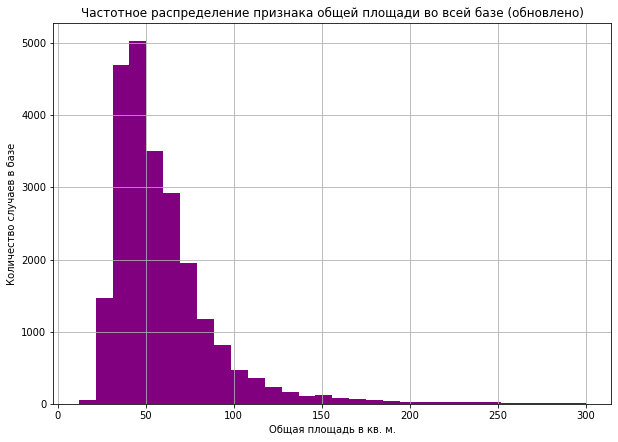

In [33]:
plt.title('Частотное распределение признака общей площади во всей базе (обновлено)')
plt.xlabel('Общая площадь в кв. м.')
plt.ylabel('Количество случаев в базе')

df['total_area'].hist(bins=30,color='purple',figsize=(10,7))
None

Переменная имеет Пуассоновское распределение. Мы уже удаляли выбросы, максимальная площадь - 300 квардатных метров. Наиболее распространённая площадь примерно равна 50 квадратным метрам. Других пиков на графике нет, что также говорит о корректности собранных данных. Далее переменная стоимости квартиры.

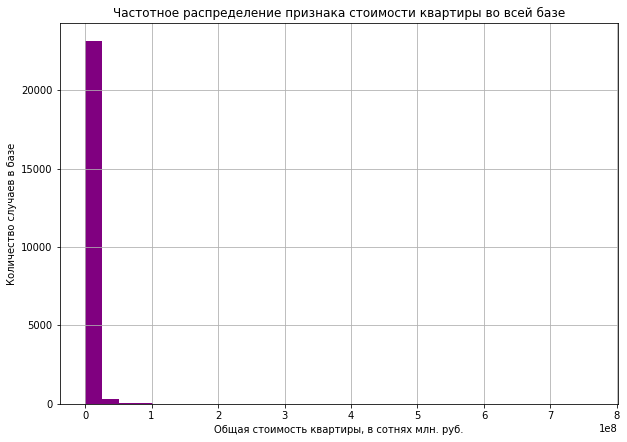

In [34]:
plt.title('Частотное распределение признака стоимости квартиры во всей базе')
plt.xlabel('Общая стоимость квартиры, в сотнях млн. руб.')
plt.ylabel('Количество случаев в базе')

df['last_price'].hist(bins=30,color='purple',figsize=(10,7))
None

У переменной очень длинный "хвост", максимум стоимости находится в районе 800 млн. руб. Посмотрим, можно ли удалить данные 1% наблюдений так, чтобы это существенно сократило правую часть графика. Удалить такие данные мы можем, т.к. стоимость крайне дорогих квартир определяется прочими факторами, которых нет в базе (как правило, стоимость ремонта и престижность ЖК).

In [35]:
df['last_price'].describe(percentiles=[.99])

count    2.356200e+04
mean     6.509304e+06
std      1.086884e+07
min      1.219000e+04
50%      4.615000e+06
99%      3.549939e+07
max      7.630000e+08
Name: last_price, dtype: float64

Признаем "выбросами" стоимость квартир от 36 млн. руб. и удалим эти данные.

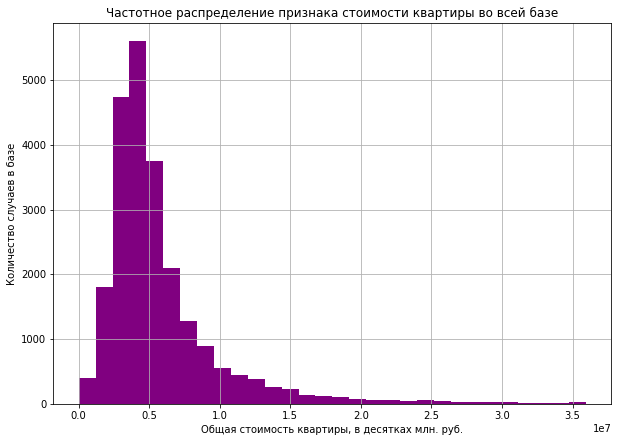

In [36]:
df = df.query("last_price < 36000000")

plt.title('Частотное распределение признака стоимости квартиры во всей базе')
plt.xlabel('Общая стоимость квартиры, в десятках млн. руб.')
plt.ylabel('Количество случаев в базе')
df['last_price'].hist(bins=30,color='purple',figsize=(10,7))
None

Распределение также скорее Пуассоновское, чем нормальное. Пик графика, то есть мода, находится в районе 5 млн. руб. Теперь можно корректно рассчитать цену квадратного метра и добавить его в таблицу.

In [37]:
df['price_per_sqrm'] = df['last_price'] / df['total_area']
df['price_per_sqrm'].sort_values(ascending = False).head(20)

4859     848484.848485
17172    848484.848485
21238    640422.350472
22869    600000.000000
16732    467914.438503
10377    440000.000000
10654    401881.720430
9694     392354.124748
15004    388888.888889
18645    387500.000000
14741    387096.774194
8062     379609.544469
6825     358974.358974
10193    355555.555556
4713     355555.555556
16562    351491.790148
8712     350070.257611
22948    345000.000000
9183     339900.000000
22635    339805.285118
Name: price_per_sqrm, dtype: float64

Всего 20 максимальных значений получившейся переменной увеличивают максимум почти в 3 раза. Уберём всё, что больше 340 тыс. за 1 кв. м, т.к. начиная с этого значения переменная убывает достаточно плавно.

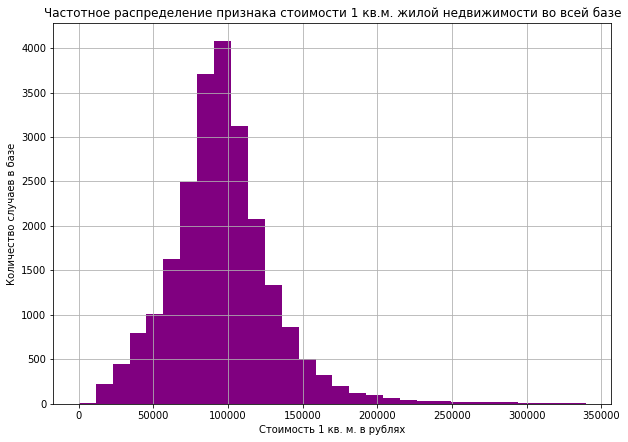

In [38]:
plt.title('Частотное распределение признака стоимости 1 кв.м. жилой недвижимости во всей базе')
plt.xlabel('Стоимость 1 кв. м. в рублях')
plt.ylabel('Количество случаев в базе')

df = df.query("price_per_sqrm < 340000")
df['price_per_sqrm'].hist(bins=30,color='purple',figsize=(10,7))
None

Полученное распределение внешне похоже на нормальное. При желании покупи квартиры в Санкт-Петербурге и окрестностях, стоит ориентироваться на 100 т.р. за 1 квадратный метр. Перейдём к переменной числа комнат.

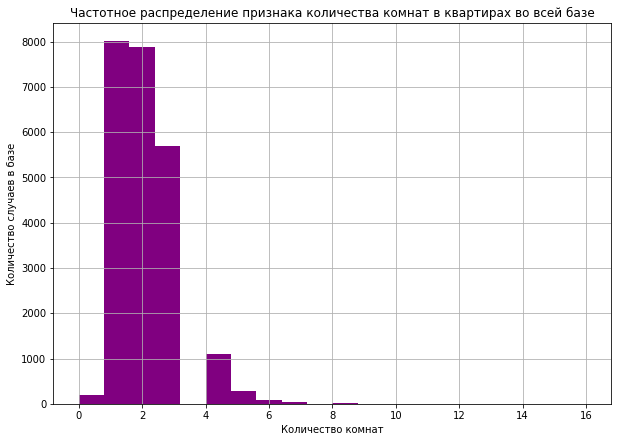

In [39]:
plt.title('Частотное распределение признака количества комнат в квартирах во всей базе')
plt.xlabel('Количество комнат')
plt.ylabel('Количество случаев в базе')

df['rooms'].hist(bins=20,color='purple',figsize=(10,7))
None

Здесь также можно избавиться от крайне больших особняков и ограничить количество комнат десятью, т.к. при большем количестве цена формируется нерыночными механизмами. Тем более ранее мы видели, что у этих многокомнатных объектов часто отсутствуют важные данные о площади. Вполне возможно, это случайно попавшие в базу объекты коммерческой недвижимости.

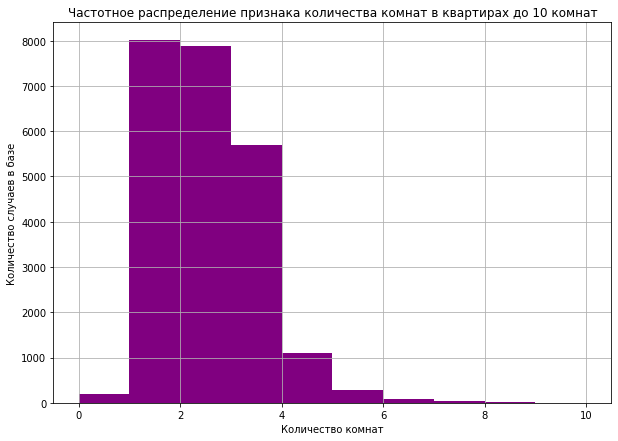

In [40]:
df = df.query("rooms <= 10")
plt.title('Частотное распределение признака количества комнат в квартирах до 10 комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество случаев в базе')

df['rooms'].hist(color='purple',figsize=(10,7))
None

Мы знаем о том, что число некоторых комнат указано как 0, в основном это студии (где также пропущена и площадь кухни), также это могут быть выставленные на продажу доли в квартирах, поэтому удалять мы их не будем. Больше всего продаётся однокомнатных квартир, что соответствует действительности, однако популярность двухкомнатных квартир сравнима. Посмотрим на переменную высоты потолков.

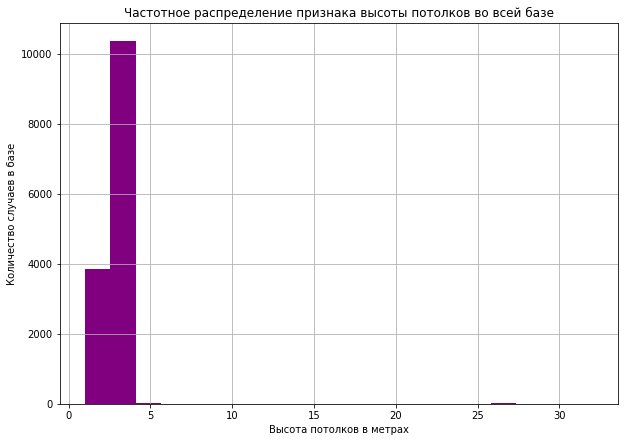

In [41]:
plt.title('Частотное распределение признака высоты потолков во всей базе')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество случаев в базе')

df['ceiling_height'].hist(bins=20,color='purple',figsize=(10,7))
None

Вряд ли можно жить в жилом помещении, высота потолков которого более 5 метров, посмотрим, сколько таких значений.

In [42]:
df.query("ceiling_height > 5")['ceiling_height'].count()

30

Это крайне малая доля базы, можно от них избавиться.

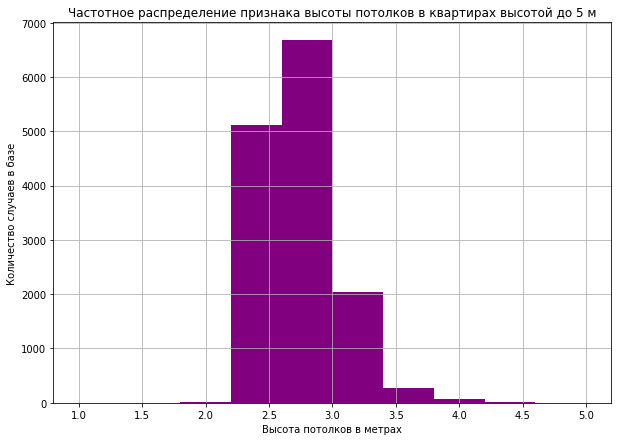

In [43]:
df = df.query("ceiling_height <= 5")

plt.title('Частотное распределение признака высоты потолков в квартирах высотой до 5 м')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество случаев в базе')

df['ceiling_height'].hist(color='purple',figsize=(10,7))
None

Также в соответствии с [СНиП](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye) высота потолка не может быть менее 2,5 м, эти квартиры тоже удалим.

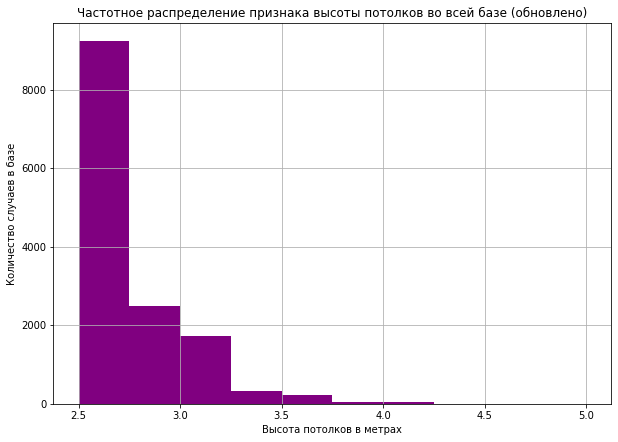

In [44]:
df = df.query("ceiling_height >= 2.5")

plt.title('Частотное распределение признака высоты потолков во всей базе (обновлено)')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество случаев в базе')

df['ceiling_height'].hist(color='purple',figsize=(10,7))
None

Собственно, 2,5 и есть самое распространённое значение в базе.

#### Вывод

Если вы в 2015-2019 году покупали квартиру в Санкт-Петербурге, то вероятнее всего, это была "двушка" 50 метров за 5 млн. руб. со стандартной высотой потолков.

### Задача: проанализировать переменную длительности продажи квартиры

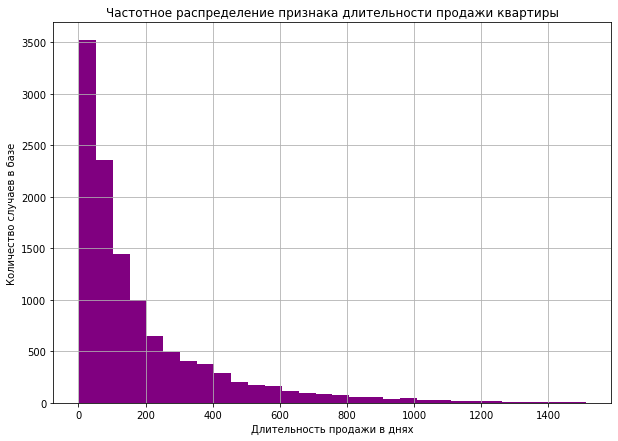

In [45]:
plt.title('Частотное распределение признака длительности продажи квартиры')
plt.xlabel('Длительность продажи в днях')
plt.ylabel('Количество случаев в базе')

df['days_exposition'].hist(bins=30,color='purple',figsize=(10,7))
None

У переменной длинный "хвост" справа, однако эти значения (продажа до 5 лет) вряд ли можно признать выбросами, т.к. они убывают достаточно плавно:

In [46]:
df['days_exposition'].sort_values(ascending = False).head(20)

20969    1512.0
14093    1497.0
19123    1485.0
4736     1477.0
6006     1452.0
9555     1434.0
14873    1430.0
11985    1417.0
3725     1395.0
12047    1375.0
12209    1363.0
11421    1362.0
17930    1361.0
9501     1355.0
12487    1350.0
21755    1349.0
17759    1346.0
7020     1344.0
749      1336.0
22455    1334.0
Name: days_exposition, dtype: float64

In [47]:
df['days_exposition'].describe()

count    11773.000000
mean       185.445851
std        221.247764
min          1.000000
25%         45.000000
50%        102.000000
75%        240.000000
max       1512.000000
Name: days_exposition, dtype: float64

Посмотрим на квартиры, которые продаются быстрее, чем за 3 месяца. Возможно, они чем-то отличаются.

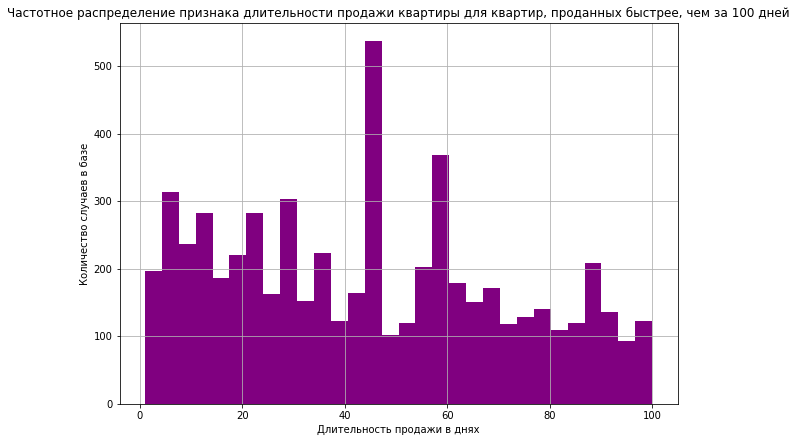

In [48]:
plt.title('Частотное распределение признака длительности продажи квартиры для квартир, проданных быстрее, чем за 100 дней')
plt.xlabel('Длительность продажи в днях')
plt.ylabel('Количество случаев в базе')

df.query("days_exposition <= 100")['days_exposition'].hist(bins=30,color='purple',figsize=(10,7))
None

In [49]:
fast_sold_description = (df.query('days_exposition <= 100')[
    ['total_area', 'rooms', 'ceiling_height', 'last_price', 'parks_around3000', 'floor',
     'ponds_around3000', 'cityCenters_nearest', 'price_per_sqrm', 'is_apartment']
    ].median().round(decimals=0).astype(int))

df_fast_sold_description = pd.DataFrame(data=fast_sold_description, columns = ['fast_sold_data'])

slow_sold_description = (df.query('days_exposition > 100')[
    ['total_area', 'rooms', 'ceiling_height', 'last_price', 'parks_around3000', 'floor',
     'ponds_around3000', 'cityCenters_nearest', 'price_per_sqrm', 'is_apartment']
    ].median().round(decimals=0).astype(int))

df_slow_sold_description = pd.DataFrame(data=slow_sold_description, columns = ['slow_sold_data'])

df_sale_speed_difference_data = pd.merge(df_fast_sold_description,
                                         df_slow_sold_description,
                                         left_index=True,
                                         right_index=True)
df_sale_speed_difference_data

,fast_sold_data,slow_sold_data
total_area,49,55
rooms,2,2
ceiling_height,3,3
last_price,4500000,4840000
parks_around3000,0,0
floor,4,4
ponds_around3000,0,0
cityCenters_nearest,13277,12866
price_per_sqrm,96572,93600
is_apartment,0,0


Выбиваются квартиры, проданные за 45 и 60 дней соответственно. Стоит уточнить характер этой переменной у инженера данных. Вполне возможно, что существенная часть объявлений размещается агентствами. 45 и 60 дней похоже на срок заключения договора, внутри которого агентство обязуется набрать определенную базу желающих посмотреть данную квартиру. Однако такая ситуация скорее характерна для провинции, чем для северной столицы. Таким образом, квартиры могут быть ещё не проданы, но объявления снимаются с продажи.

Тем не менее, если предположить, что это действительные данные, и срок размещения объявления и есть срок продажи, то мы увидим принципиальные различия между быстро и медленно продающимися квартирами.

- Быстрее продаются квартиры меньшей площадью (49 кв. м. против 55 в остальной базе),
- Квартиры, проданные меньше, чем за 3 месяца, были на 7% дешевле,

Т.к. это в срденем меньшие и более дешёвые квартиры, это оказываются квартиры более удалённые от центра, хотя разница небольшая.

#### Вывод

В среднем квартира продаётся за полгода (189 дней). Если квартира продаётся за полтора месяца, это можно считать удачей, т.к. 75% всех квартир продаётся дольше. С 50% вероятностью квартира может продасться за 103 дня и быстрее. Больше всего на срок влияет цена квартиры (абсолютная): квартиры, проданные быстрее, чем за 3 месяца, были на 7% дешевле, соответственно, это были квартиры меньшей площадью (49 кв.м.) и дальше от центра (13,2 км. в среднем). Если квартира не продалась за 8 месяцев, стоит снизить цену или хотя бы сравнить её с калькулятором, который мы сможем разработать в будущем, т.к. только четверть квартир продаётся за это время или дольше.


### Задача определить, какие факторы больше всего влияют на стоимость квартиры

Приступим к изучению основной переменной - стоимости квартиры.

In [50]:
df.corr()['last_price']

total_images                         0.144694
last_price                           1.000000
total_area                           0.803091
rooms                                0.531492
ceiling_height                       0.505542
floors_total                         0.076278
living_area                          0.707986
floor                                0.082321
is_apartment                         0.019301
studio                              -0.047050
open_plan                           -0.015100
kitchen_area                         0.601034
balcony                              0.024273
airports_nearest                    -0.038602
cityCenters_nearest                 -0.345842
parks_around3000                     0.200275
parks_nearest                        0.030692
ponds_around3000                     0.198435
ponds_nearest                       -0.134715
days_exposition                      0.124424
default_living_area_rate_by_rooms    0.435411
if_sum_area_wrong                 

Вполне ожидаемо цена в основном зависит от переменных площадей: общей площади, жилой площади и площади кухни. Корреляция с общей площадью наиболее сильная почти 0,8. Именно поэтому стоит освободить переменную стоимости от влияния площади и использовать для дальнейшего анализа стоимость квадратного метра.

Интересно, что корреляция общей стоимости с количеством комнат средняя. Предположим, что нам мешают нулевые значения, а также слабая связь стоимости и количества комнат, когда их больше 4. Объединим число комнат от 5 до 10 в одну категорию и оставим их в категории номер 5, чтобы переменная осталась порядковой.

In [51]:
df['rooms_grouped'] = df['rooms'].map({0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:5, 7:5, 8:5, 9:5, 10:5})
print(df.loc[:,['rooms_grouped','rooms']].sample(10))
df.corr()['rooms_grouped']['last_price']

       rooms_grouped  rooms
1617               5      5
12179              3      3
11528              2      2
9846               5      5
10522              1      1
4483               1      1
17455              2      2
11005              2      2
7134               1      1
12702              2      2


0.5195352283736524

Коэффициент корреляции даже уменьшился. Когда однокомнатная квартира в центре превышает стоимость трёхкомнатной на окраине, это вполне возможно. Количество комнат - не лучшая переменная для подсчёта коэффициента корреляции ввиду небольшой вариативности, посмотрим вручную, как отличаются цены на квартиры в зависимости от количества комнат.

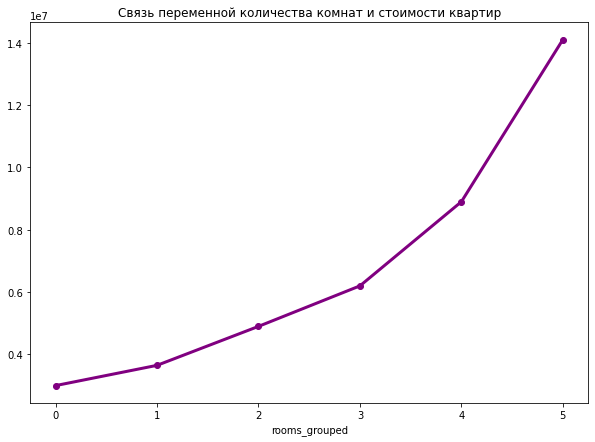

In [52]:
(df.groupby('rooms_grouped')['last_price']
    .median()
    .plot(
        color='purple',
        figsize=(10,7),
        title='Связь переменной количества комнат и стоимости квартир',
        linewidth=3,
        style='-o'))
None

Очевидно, что однокомнатная квартира стоит в среднем в 2 раза дешевле трехкомнатной, логика прослеживается. Перейдём к более логичной для анализа переменной стоимости квадратного метра жилья.

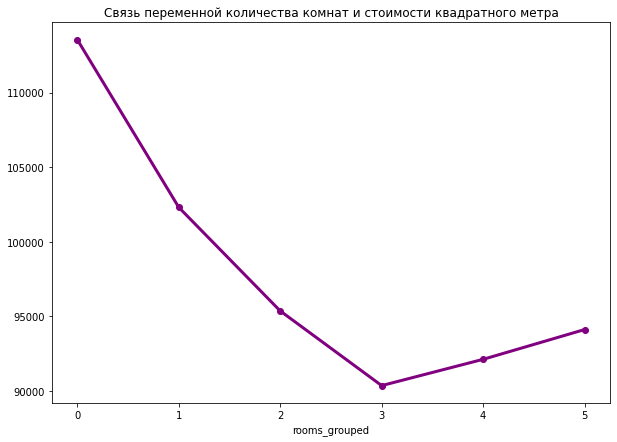

In [53]:
(df.groupby('rooms_grouped')['price_per_sqrm']
    .median()
    .plot(
        color='purple',
        figsize=(10,7),
        title='Связь переменной количества комнат и стоимости квадратного метра',
        linewidth=3,
        style='-o'))
None

Самые дорогие метры - в студиях (0 комнат) и однокомнатных квартирах. Цена метра снижается по мере увеличения числа комнат, однако, когда комнат становится 4 и более, за счёт перехода такой недвижимости в категорию "элитного" жилья цена метра вновь становится выше. Именно поэтому коэффициент корреляции был не очень высоким. Далее посмотрим на этаж.

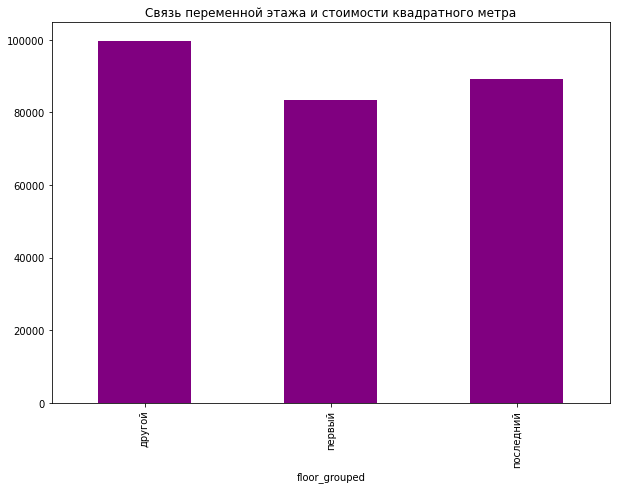

In [54]:
(df.groupby('floor_grouped')['price_per_sqrm']
    .median()
    .plot(
        kind = 'bar',
        color='purple',
        figsize=(10,7),
        title='Связь переменной этажа и стоимости квадратного метра',
    ))
None

Решение купить первый этаж может сэкономить пятую часть бюджета. Последний этаж сохранит десятую часть бюджета. Посмотрим на переменную удалённости от центра.

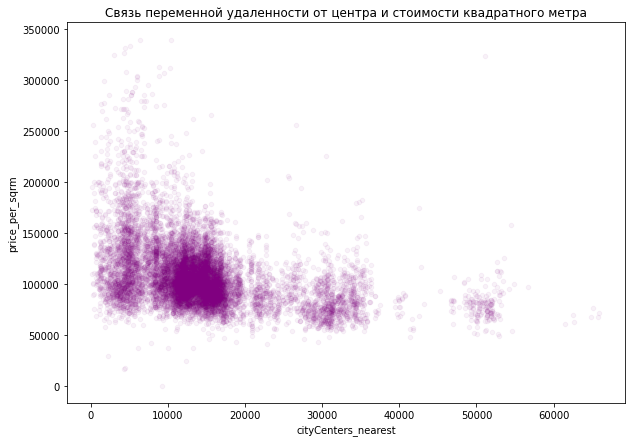

In [55]:
df.plot(
    x='cityCenters_nearest',
    y='price_per_sqrm',
    kind = 'scatter',
    color='purple',
    figsize=(10,7),
    alpha=0.05,
    title='Связь переменной удаленности от центра и стоимости квадратного метра')
None

Петербург - старый город, даже в радиусе 10 км от центра можно найти как дешёвое жильё, так и дорогое. Однако обратное будет неверно. Дорогое жилье сосредоточено в центре.

Для анализа стоимости жилья за квадратный метр и даты размещения нам подойдут линейные графики. Посмотрим на день недели размещения.

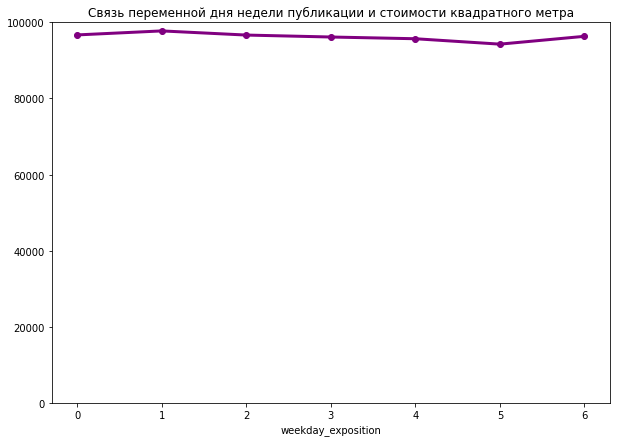

In [56]:
(df.groupby('weekday_exposition')['price_per_sqrm']
    .median()
    .plot(
        ylim = [0,100000],
        color='purple',
        figsize=(10,7),
        title='Связь переменной дня недели публикации и стоимости квадратного метра',
        linewidth=3,
        style='-o'))
None

Квартиры чуть дороже часто публикуются в начале недели, подешевле - в конце, однако в целом среднее менятеся очень несущественно.

Также не меняется цена в зависимости от месяца размещения объявления.

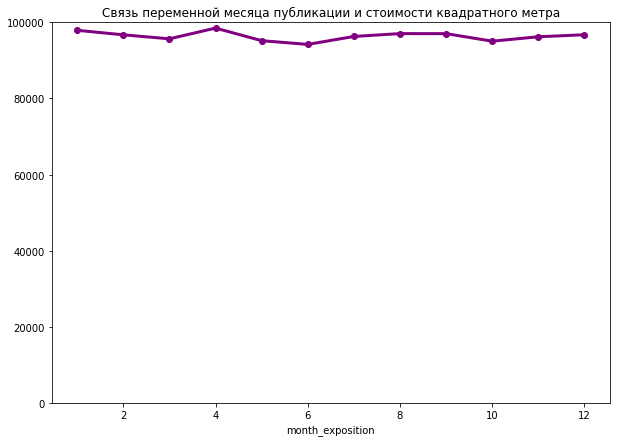

In [57]:
(df.groupby('month_exposition')['price_per_sqrm']
    .median()
    .plot(
        ylim = [0,100000],
        color='purple',
        figsize=(10,7),
        title='Связь переменной месяца публикации и стоимости квадратного метра',
        linewidth=3,
        style='-o'))
None

Но наверняка цены будут расти с течением времени:

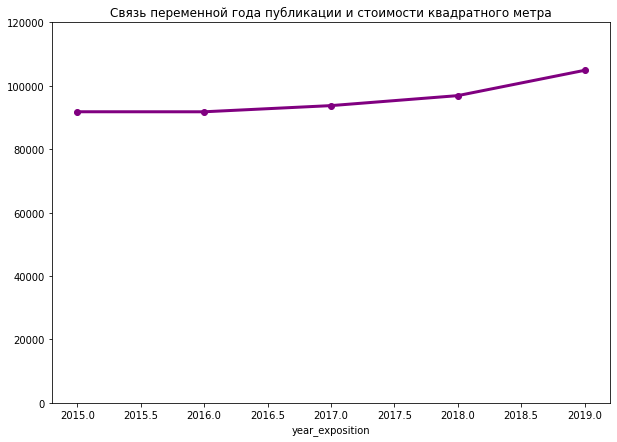

In [58]:
(df.groupby('year_exposition')['price_per_sqrm']
    .median()
    .plot(
        ylim = [0,120000],
        color='purple',
        figsize=(10,7),
        title='Связь переменной года публикации и стоимости квадратного метра',
        linewidth=3,
        style='-o'))
None

За 5 лет исследования рынок изменился. Начиная с 2015 года рынок восстанавливается после кризиса, цены растут, причём за 2018-2019 год они выросли наиболее существенно, инфляция составила порядка 10%.

#### Вывод

Среди проанализиорванных факторов наибольшее влияние на цену оказывает площадь квартиры. А на цену за квадратный метр - количество комнат в квартире. Из неочевидных результатов - дорогие квартиры в основном расположены в центре, однако и в центре, и на окраинах достаточно много предложений по средней и цене ниже среднерыночной. Если согласиться на последний этаж, можно сэкономить 10% бюджета, на первый - 20%. Средняя цена за квадратный метр находится на уровне 100 тыс. руб. Если покупка актуальна, не стоит её откладывать, т.к. цены растут, например, за последний в исследовании год - примерно на 10%.

### Задача определить топ-10 населённых пунктов по стоимости недвижимости

Выделим топ 10 населённых пунктов по количеству объявлений и посчитаем средние цены за квадратный метр в них.

In [59]:
(pd.pivot_table(df, index='locality_name', values='price_per_sqrm', aggfunc={'count','mean'})
    .sort_values(by = 'count', ascending=False)
    .head(10))

,count,mean
locality_name,,
Санкт-Петербург,9823,111604.533335
Всеволожск,268,67469.035977
Пушкин,228,103818.823275
посёлок Шушары,217,79538.627641
Колпино,201,75949.002224
посёлок Мурино,198,87369.004392
Гатчина,148,70024.959358
Петергоф,143,85126.692969
посёлок Парголово,136,90977.423171


#### Вывод


В Санктр-Петербурге нельзя говорить о существовании агломерации. В ближайших населённых пунктах продается в десятки раз меньше объектов недвижимости.

Дороже всего квадратный метр в самом Санкт-Петербурге. Близок к нему по ценам туристический Пушкин и Сестрорецк. А вот переехав во Всеволожск или Гатчину, можно сэкономить треть бюджета.

### Задача: определить, какая область входит в понятие "центра" Санкт-Петербурга

Есть центр города в границах муниципального деления. А есть центр в представлении самих жителей города. И он должен довольно резко выделяться по стоимости квадратного метра, попробуем это проверить.

Создадим отдельный датафрейм.

In [60]:
df_spb = df.query("locality_name == 'Санкт-Петербург'")
df_spb.shape

(9823, 32)

Петербуржских квартир 9823 в базе, это мы помним по предыдущей задаче, значит данные отобраны верно. Переведём расстояние до центра в километры и округлим до целых.

In [61]:
df_spb['cityCenters_nearest_rounded_km'] = df_spb['cityCenters_nearest']/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Округлим полученные значения и посмотрим на наполняемость групп.

In [62]:
df_spb['cityCenters_nearest_rounded_km'] = df_spb['cityCenters_nearest_rounded_km'].round(0)
df_spb['cityCenters_nearest_rounded_km'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


15.0    1028
12.0    1027
13.0     938
14.0     842
16.0     805
11.0     722
17.0     543
5.0      543
10.0     479
4.0      436
9.0      384
8.0      384
6.0      334
7.0      236
3.0      230
2.0      197
18.0     142
1.0      120
22.0     104
19.0      97
21.0      75
23.0      58
20.0      24
0.0       15
26.0      15
25.0       8
24.0       5
29.0       5
27.0       1
28.0       1
Name: cityCenters_nearest_rounded_km, dtype: int64

Есть смысл объединить всё, что равно и больше 18 км в одну категорию, чтобы наполняемость групп была сравнима.


In [63]:
df_spb['cityCenters_nearest_rounded_km_grouped'] = df_spb['cityCenters_nearest_rounded_km'].map({
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7,
    8:8,
    9:9,
    10:10,
    11:11,
    12:12,
    13:13,
    14:14,
    15:15,
    16:16,
    17:17,
    18:18,
    19:18,
    20:18,
    21:18,
    22:18,
    23:18,
    24:18,
    25:18,
    26:18,
    27:18,
    28:18,
    29:18,
    30:18})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Построим график зависимости средней цены за квадратный метр от расстояния до центра в километрах.

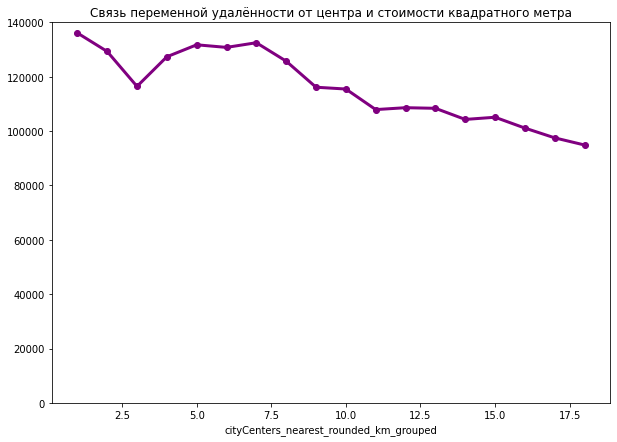

In [64]:
(df_spb.groupby('cityCenters_nearest_rounded_km_grouped')['price_per_sqrm']
    .mean()
    .plot(
        color='purple',
        ylim = [0,140000],
        figsize=(10,7),
        title='Связь переменной удалённости от центра и стоимости квадратного метра',
        linewidth=3,
        style='-o'))
None

#### Вывод

Если считать, что "провал" на графике на уровне 3 км вызван тем, что в этом районе расположен старый фонд по низкой цене,то уровень цены за квадратный метр меняется несущественно до отметки в 7 км. Далее, на уровне 8 и 9 километров падение драматичное. Таким образом, можно определить, что психологическая отметка удалённости от центра, при которой собственники считают, что можно повысить стоимость за расположение в сердце города, находится на уровне 7 км.

### Задача определить, чем квартиры в центре отличаются помимо стоимости

Посмотрим на основные характеристики квартир в центре (center_data) и вне центра (noncenter_data). Выбраны медианы вместо средних, т.к. мы очень аккуратно чистили данные от выбросов и средние по-прежнему существенно выше медиан.

In [65]:
center_description = (df_spb.query('cityCenters_nearest_rounded_km <=7')[
    ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'parks_around3000',
     'ponds_around3000', 'days_exposition', 'price_per_sqrm']
    ].median())

df_center_description = pd.DataFrame(data=center_description, columns = ['center_data'])

noncenter_description = (df_spb.query('cityCenters_nearest_rounded_km >7')[
    ['total_area', 'rooms', 'ceiling_height', 'floors_total','parks_around3000',
     'ponds_around3000', 'days_exposition', 'price_per_sqrm']
    ].median())

df_noncenter_description = pd.DataFrame(data=noncenter_description, columns = ['noncenter_data'])

df_center_difference_data = pd.merge(df_center_description, df_noncenter_description, left_index=True, right_index=True)
df_center_difference_data

,center_data,noncenter_data
total_area,77.000000,51.000000
rooms,3.000000,2.000000
ceiling_height,3.000000,2.600000
floors_total,5.000000,10.000000
parks_around3000,1.000000,0.000000
ponds_around3000,1.000000,0.000000
days_exposition,140.000000,89.000000
price_per_sqrm,119815.668203,102537.313433


#### Вывод

Различия принципиальны. Итак, в центре много больших квартир, поэтому средние (медианные) площади больше. Также в центре популярны трёхкомнатные квартиры, когда вне центра - двухкомнатные. Высота потолков в центральных районах также ближе к 3 метрам, а на окраинах - стандартные 2,50. В центре малоэтажная застройка, на окраинах дома большей этажностью. Покупая квартиру в центре, вокрук, скорее всего, будут и парки, и водоёмы, чего не скажешь о картирах на окраинах. Но и стоят квартиры в центре дороже на 20% за квадратный метр, что с учётом больших площадей даёт рост общей сторимости в 2 раза, поэтому продаются дольше - 4-5 месяцев в среднем, когда на окраинах предложения уходят за 3 месяца.

## Общий вывод

Мы подготовили базу для построения модели расчёта стоимости квартиры в зависимости от значений оцифрованных параметров.

При построении данной модели предлагается в качестве зависимой переменной взять цену за квадратный метр.

В качестве независимых переменных в первую очередь следует обратить внимание на следующие параметры:
1. Количество комнат: самый дорогой "метр" - в однокомнатных квартирах (102,3 т.р.), самый дешёвый - в трёхкомнатных (90,5 т.р.)
2. Факт расположения квартиры в радиусе 7 км от центра (в этом случае квартира стоит 119,8 т.р. за кв. м. в самом Санкт-Петербурге, в противном - 102.5 т.р. за кв.м.)
3. Факт расположения квартиры на первом этаже (стоит 83,4 т.р. за кв.м.), на последнем этаже (по 89,2 т.р. за кв.м.) или на другом (по 99,8 т.р. за кв.м.)

Также стоит помнить, что для квартир в городе будет играть роль инфраструктура в пешей доступности (парки, водоёмы, расстояние до аэропорта). Для квартир в пригороде эти параметры не будут иметь значение.

Помимо этого мы выяснили особенности города. Т.к. город построен давно, и в центре, и на окраинах есть большое количество предложений по среднерыночной цене и цене ниже рынка. Однако наиболее дорогое жильё расположено в основном в центре. В центре больше квартир с высокими потолками и большей площади, чем на окраинах.